In [1]:
import pandas as pd
import matplotlib.pyplot as plt

n_sim = 10

def get_rec_df(case_study, benchmark=False):

    if case_study == 'bac':
        rec_df = pd.read_csv('data/bac/simulations/bac/recommendations.csv')
        if benchmark:
            rec_df = pd.read_csv('data/bac/simulations/benchmark/recommendations.csv')
    elif case_study == 'bpi_17_before':
        rec_df = pd.read_csv('data/bpi17/simulations/before/recommendations.csv')
        if benchmark:
            rec_df = pd.read_csv('data/bpi17/simulations/before_benchmark/recommendations.csv')
    elif case_study == 'bpi_17_after':
        rec_df = pd.read_csv('data/bpi17/simulations/after/recommendations.csv')
        if benchmark:
            rec_df = pd.read_csv('data/bpi17/simulations/after_benchmark/recommendations.csv')

    for j in range(1,n_sim+1):
        rec_df[f'diff_abs_{j}'] = rec_df[f'cycle_sim_{j}'] - rec_df['cycle_real']
        rec_df[f'diff_rel_{j}'] = (rec_df[f'cycle_sim_{j}'] - rec_df['cycle_real']) / rec_df['cycle_real']

    return rec_df

##### Choose case study

In [2]:
case_studies = {
    0: 'bac',
    1: 'bpi_17_after',
    2: 'bpi_17_before'
}

case_study = case_studies[0]  # change the number accordingly to the case study
benchmark = False  # change to True if you want to look at the benchmark results

rec_df = get_rec_df(case_study, benchmark=False)

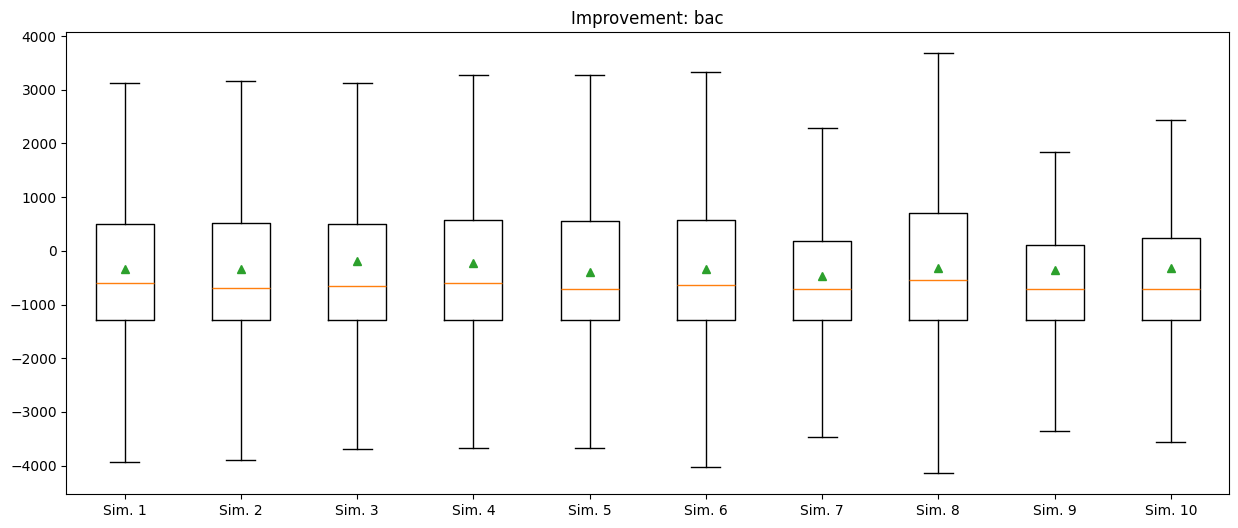

In [3]:
plt.figure(figsize=(15,6))
plt.title('Improvement: ' + case_study)
plt.boxplot(rec_df[[f'diff_abs_{j}' for j in range(1,n_sim+1)]], labels=[f'Sim. {j}' for j in range(1,n_sim+1)], showfliers=False, showmeans=True)
plt.show()

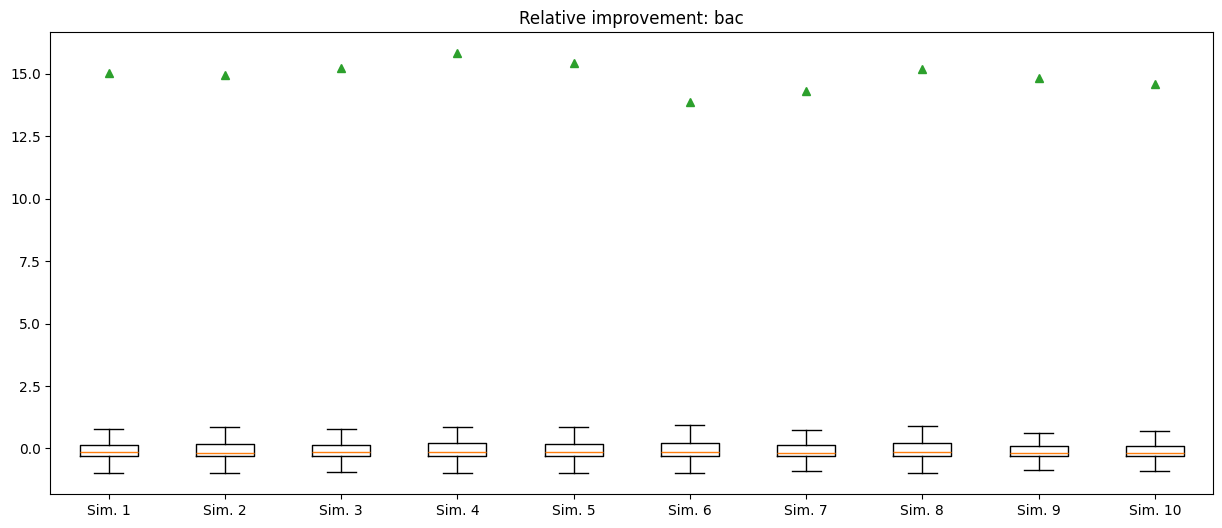

In [4]:
plt.figure(figsize=(15,6))
plt.title('Relative improvement: ' + case_study)
plt.boxplot(rec_df[[f'diff_rel_{j}' for j in range(1,n_sim+1)]], labels=[f'Sim. {j}' for j in range(1,n_sim+1)], showfliers=False, showmeans=True)
plt.show()

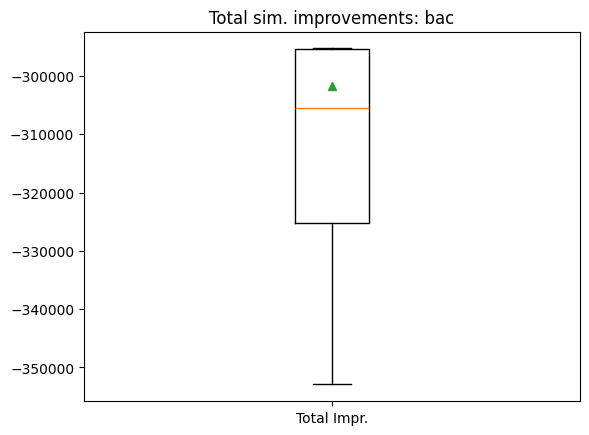

In [5]:
plt.title('Total sim. improvements: ' + case_study)
plt.boxplot(rec_df[[f'diff_abs_{j}' for j in range(1,n_sim+1)]].sum(), labels=['Total Impr.'], showfliers=False, showmeans=True)
plt.show()

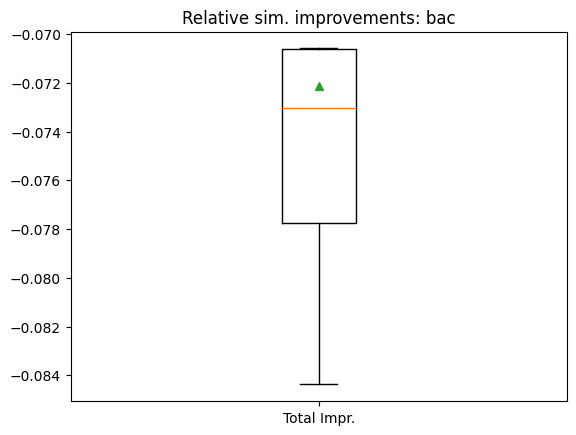

In [6]:
plt.title('Relative sim. improvements: ' + case_study)
plt.boxplot(rec_df[[f'diff_abs_{j}' for j in range(1,n_sim+1)]].sum()/rec_df['cycle_real'].sum(), labels=['Total Impr.'], showfliers=False, showmeans=True)
plt.show()

#### Results

In [7]:
case_studies = ['bac', 'bpi_17_before', 'bpi_17_after']

results = dict()
for c in case_studies:
    for benchmark in [False, True]:
        rec_df = get_rec_df(c, benchmark=benchmark)

        avg_tot_impr = (rec_df[[f'diff_abs_{j}' for j in range(1,n_sim+1)]].sum()/60).mean()
        std_tot_impr = (rec_df[[f'diff_abs_{j}' for j in range(1,n_sim+1)]].sum()/60).std()

        avg_trace_impr = (rec_df[[f'diff_abs_{j}' for j in range(1,n_sim+1)]].mean()/60).mean()
        std_trace_impr = (rec_df[[f'diff_abs_{j}' for j in range(1,n_sim+1)]].mean()/60).std()

        avg_rel_tot_impr = (rec_df[[f'diff_abs_{j}' for j in range(1,n_sim+1)]].sum() / rec_df['cycle_real'].sum()).mean()
        std_rel_tot_impr = (rec_df[[f'diff_abs_{j}' for j in range(1,n_sim+1)]].sum() / rec_df['cycle_real'].sum()).std()

        avg_rel_trace_impr = rec_df[[f'diff_rel_{j}' for j in range(1,n_sim+1)]].mean().mean()
        std_rel_trace_impr = rec_df[[f'diff_rel_{j}' for j in range(1,n_sim+1)]].mean().std()

        avg_median_rel_trace_impr = (rec_df[[f'diff_rel_{j}' for j in range(1,n_sim+1)]]).median().mean()
        std_median_rel_trace_impr = (rec_df[[f'diff_rel_{j}' for j in range(1,n_sim+1)]]).median().std()

        rec_replicable = 1 - rec_df["top_k"].isna().sum()/len(rec_df)

        if benchmark:
            results[c+'_benchmark'] = [avg_tot_impr, std_tot_impr, avg_trace_impr, std_trace_impr, avg_rel_tot_impr, std_rel_tot_impr, avg_rel_trace_impr, std_rel_trace_impr, avg_median_rel_trace_impr, std_median_rel_trace_impr, rec_replicable]
        else:
            results[c] = [avg_tot_impr, std_tot_impr, avg_trace_impr, std_trace_impr, avg_rel_tot_impr, std_rel_tot_impr, avg_rel_trace_impr, std_rel_trace_impr, avg_median_rel_trace_impr, std_median_rel_trace_impr, rec_replicable]


In [8]:
results_df = pd.DataFrame(results)
results_df.index = ['Avg tot. improvement (hours)', 
                    'Std tot. improvement (hours)', 
                    'Avg trace improvement (hours)', 
                    'Std trace improvement (hours)', 
                    'Avg relative tot improvement', 
                    'Std relative tot improvement',
                    'Avg relative trace improvement',
                    'Std relative trace improvement',
                    'Median relative trace improvement',
                    'Std Median relative trace improvement',
                    'Replayable recs']

In [9]:
results_df.T

,Avg tot. improvement (hours),Std tot. improvement (hours),Avg trace improvement (hours),Std trace improvement (hours),Avg relative tot improvement,Std relative tot improvement,Avg relative trace improvement,Std relative trace improvement,Median relative trace improvement,Std Median relative trace improvement,Replayable recs
bac,-5028.955601,1150.179223,-5.496126,1.257026,-0.072137,0.016498,14.925330,0.562759,-0.155095,0.009515,0.956284
bac_benchmark,-2156.767269,2236.035548,-2.592268,2.687543,-0.034441,0.035707,16.193335,0.617302,-0.154983,0.007229,0.960337
bpi_17_before,-123050.137289,5841.336751,-89.948931,4.269983,-0.361194,0.017146,-0.191126,0.047529,-0.685487,0.008243,0.956871
bpi_17_before_benchmark,-111754.486460,4117.232968,-81.691876,3.009673,-0.328037,0.012085,-0.147909,0.081397,-0.502900,0.022874,0.814327
bpi_17_after,-20568.030680,5058.906345,-8.381431,2.061494,-0.060226,0.014813,-0.243498,0.157145,-0.866323,0.006196,0.907090
bpi_17_after_benchmark,-82575.091260,6317.670452,-33.676628,2.576538,-0.241821,0.018501,-0.140842,0.074365,-0.622661,0.020175,0.725530
